<a href="https://colab.research.google.com/github/saltamirano1/Skyline-Math-200/blob/main/Chi_Squared_Lab_(_ICU_Admissions).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
data = 'https://raw.githubusercontent.com/kmath22/kmath22/refs/heads/main/ICUAdmissions%20(1).csv'

df = pd.read_csv(data)
df.head()

,ID,Status,Age,Sex,Race,Service,Cancer,Renal,Infection,CPR,...,HeartRate,Previous,Type,Fracture,PO2,PH,PCO2,Bicarbonate,Creatinine,Consciousness
0,8,0,27,1,1,0,0,0,1,0,...,88,0,1,0,0,0,0,0,0,1
1,12,0,59,0,1,0,0,0,0,0,...,80,1,1,0,0,0,0,0,0,1
2,14,0,77,0,1,1,0,0,0,0,...,70,0,0,0,0,0,0,0,0,1
3,28,0,54,0,1,0,0,0,1,0,...,103,0,1,1,0,0,0,0,0,1
4,32,0,87,1,1,1,0,0,1,0,...,154,1,1,0,0,0,0,0,0,1


In [ ]:
pip install researchpy

In [ ]:
import researchpy as rp

Univariate Statistics

In [ ]:
df['Sex'].replace( [0,1] , ['Male','Female'], inplace=True)

/tmp/ipython-input-698520816.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace( [0,1] , ['Male','Female'], inplace=True)


In [ ]:
rp.summary_cat(df['Sex'])

,Variable,Outcome,Count,Percent
0,Sex,Male,124,62.0
1,,Female,76,38.0


<Axes: xlabel='Sex'>

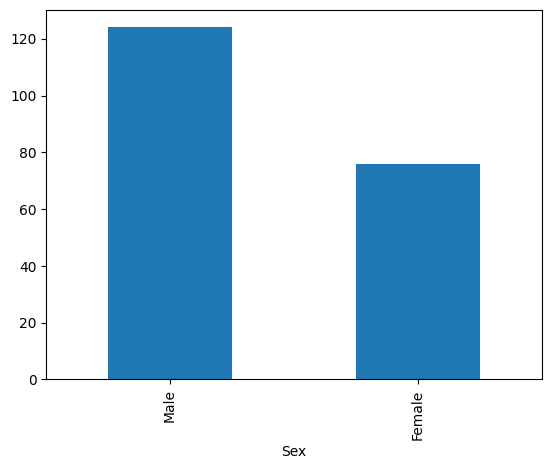

In [ ]:
df['Sex'].value_counts().plot(kind = 'bar')

In [ ]:
df['CPR'].replace( [0,1] , ['No','Yes'], inplace=True)

/tmp/ipython-input-2729373513.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CPR'].replace( [0,1] , ['No','Yes'], inplace=True)


In [ ]:
#Create a frequency table for fracture
rp.summary_cat(df['CPR'])

,Variable,Outcome,Count,Percent
0,CPR,No,187,93.5
1,,Yes,13,6.5


<Axes: xlabel='CPR'>

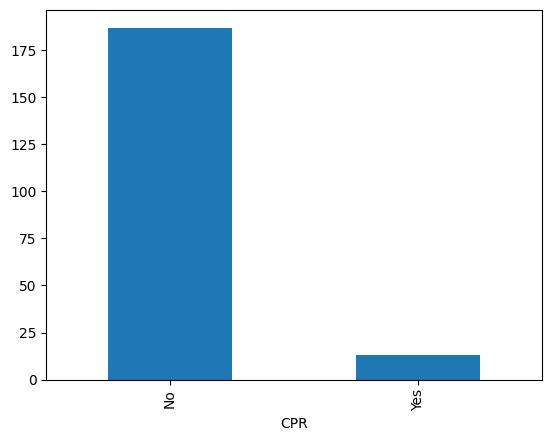

In [ ]:
#create a bar graph for fracture
df['CPR'].value_counts().plot(kind = 'bar')


Bivariate Statistics

In [ ]:

pd.crosstab(df['Sex'], df['CPR'], margins=True).round(2)

CPR,No,Yes,All
Sex,,,
Female,68,8,76
Male,119,5,124
All,187,13,200


In [ ]:
pd.crosstab(df['Sex'], df['CPR'], normalize=True, margins=True).round(2)

CPR,No,Yes,All
Sex,,,
Female,0.34,0.04,0.38
Male,0.60,0.02,0.62
All,0.94,0.06,1.00


In [ ]:
#Show table using the explanatory variable
pd.crosstab(df['Sex'], df['CPR'], normalize='index', margins=True).round(2)

CPR,No,Yes
Sex,,
Female,0.89,0.11
Male,0.96,0.04
All,0.94,0.06


Graphs:


*   Bar Graphs

1.   Stacked Bar Graph
2.   Mosiac Plot





<Axes: xlabel='Sex'>

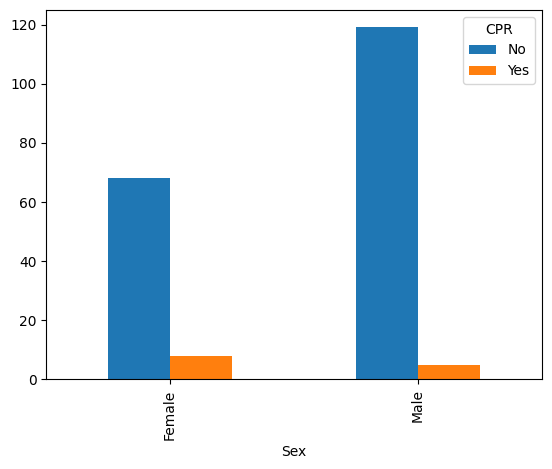

In [ ]:
#Bar Graphs

pd.crosstab(df['Sex'], df['CPR']).plot(kind = 'bar')

<Axes: xlabel='Sex'>

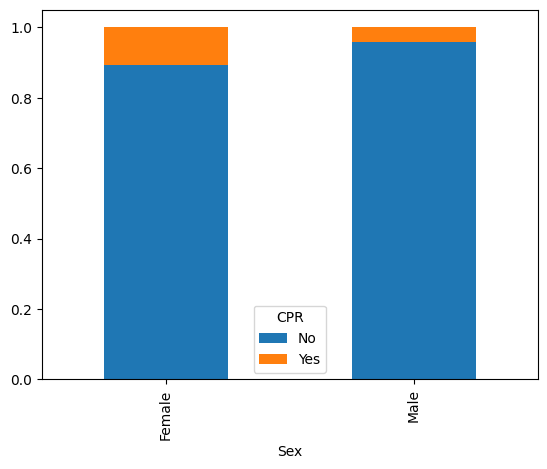

In [ ]:
pd.crosstab(df['Sex'], df['CPR'], normalize = 'index').plot(kind = 'bar', stacked = True)

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

(<Figure size 640x480 with 3 Axes>,
 {('Female', 'No'): (0.0,
   np.float64(0.0),
   0.37810945273631846,
   np.float64(0.8917642944570728)),
  ('Female', 'Yes'): (0.0,
   np.float64(0.8950865535932855),
   0.37810945273631846,
   np.float64(0.10491344640671445)),
  ('Male', 'No'): (0.3830845771144279,
   np.float64(0.0),
   0.6169154228855722,
   np.float64(0.9564891222805701)),
  ('Male', 'Yes'): (0.3830845771144279,
   np.float64(0.9598113814167827),
   0.6169154228855722,
   np.float64(0.04018861858321719))})

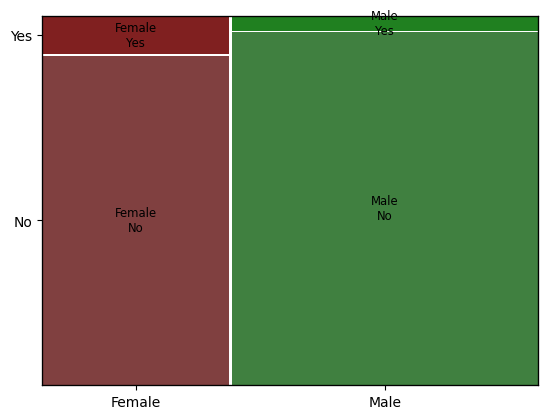

In [ ]:
#Mosaic Plot
mosaic( df, ['Sex','CPR'])

In [ ]:
crosstab, test_results, expected = rp.crosstab(df['Sex'], df['CPR'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")



/usr/local/lib/python3.12/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 1.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


In [ ]:
print(crosstab)

         CPR            
CPR       No  Yes    All
Sex                     
Female  34.0  4.0   38.0
Male    59.5  2.5   62.0
All     93.5  6.5  100.0


In [ ]:
print(expected)

           CPR      
CPR         No   Yes
Sex                 
Female   71.06  4.94
Male    115.94  8.06


In [ ]:
print(test_results)

                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    3.2697
1                    p-value =    0.0706
2               Cramer's phi =    0.1279
